#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/desafio-de-prediccion-de-precios-de-portatiles

## Librerias

In [20]:
import Toolbox_ML as tlb
import bootcampviztools as bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



## Data

In [21]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/test.csv")
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,181,1098,HP,Spectre x360,Ultrabook,13.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.3kg
1,708,330,Acer,Aspire 5,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8GB,256GB SSD,AMD Radeon RX 540,Windows 10,2.2kg
2,862,1260,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,500GB HDD,Intel HD Graphics 520,Linux,2.4kg
3,1064,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
4,702,1015,HP,ENVY -,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1281,145,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.4kg
387,524,1195,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31kg
388,1015,1070,HP,250 G5,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,No OS,1.96kg
389,1236,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg


## Data exploration

In [22]:
tlb.describe_df(df)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
Tipos,int64,int64,object,object,object,float64,object,object,object,object,object,object,object
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,391,391,17,267,6,15,33,67,9,24,74,8,125
% Cardinalidad,100.0,100.0,4.35,68.29,1.53,3.84,8.44,17.14,2.3,6.14,18.93,2.05,31.97


Creo que "id", "laptop_ID" y "Product" no aportan informacion

In [23]:
feat_out = ["id", "laptop_ID", "Product"]

## Data processing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


## Data processing

In [25]:
df["TypeName"].value_counts()

TypeName
Notebook              205
Gaming                 67
Ultrabook              61
2 in 1 Convertible     36
Workstation            11
Netbook                11
Name: count, dtype: int64

In [26]:
feat_cat = ["TypeName"]

In [27]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                161
1366x768                                          73
IPS Panel Full HD 1920x1080                       67
IPS Panel Full HD / Touchscreen 1920x1080         16
Full HD / Touchscreen 1920x1080                   15
1600x900                                          12
Quad HD+ / Touchscreen 3200x1800                   7
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      3
Touchscreen 2560x1440                              3
Touchscreen 2256x1504                              3
IPS Panel Quad HD+ / Touchscreen 3200x1800         2
4K Ultra HD 3840x2160                              2
1440x900                                           2
IPS Panel Quad HD+ 2560x1440                       2
4K Ultra HD / Touchscreen 3840x2160                2
IPS Panel Touchscreen 1366x768                     2
IPS Panel 4K Ultra HD 3840x2160                    2
IPS Panel 1366x768                                 2
IPS Panel Retina Display 2560

Las pantallas incrementan el precio del equipo cuanto mas resolucion tienen. Voy a extraer la resolucion. La calcularé en total de pixeles dividiré por 10e6.

In [28]:
patron = r"(\d+)x(\d+)"

In [29]:
df["Res_H"] = [int(re.search(patron, valor).group(1)) for valor in df["ScreenResolution"]]
df["Res_V"] = [int(re.search(patron, valor).group(2)) for valor in df["ScreenResolution"]]
df["Res_tot"] = df["Res_H"] * df["Res_V"] /1000000

In [30]:
feat_out += ["ScreenResolution", "Res_H", "Res_V"]

Analizo Cpu

In [31]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz            48
Intel Core i7 7500U 2.7GHz            46
Intel Core i7 7700HQ 2.8GHz           44
Intel Core i7 8550U 1.8GHz            29
Intel Core i5 8250U 1.6GHz            18
                                      ..
Intel Core i5 2.0GHz                   1
AMD A6-Series 7310 2GHz                1
Intel Core i7 2.9GHz                   1
Intel Core i5 7Y54 1.2GHz              1
Intel Celeron Dual Core N3350 2GHz     1
Name: count, Length: 67, dtype: int64

La CPUs incrementan el precio del equipo cuanto a mas velocidad(=GHz) de procesamiento tienen. Voy a extraer la velocidad.

In [32]:
list_cpu = [valor [-3:] for valor in df["Cpu"]]

In [33]:
GHz_freq = list_cpu.count("GHz") / len(list_cpu)
GHz_freq

1.0

Todo esta medido en GHZ

In [34]:
patron_1 = r"(\d+\.\d+)GHz"
patron_2 = r"(\d+)GHz"

In [35]:
list_cpu = []
for valor in df["Cpu"]:
    coincidencia_1 = re.search(patron_1, valor)
    coincidencia_2 = re.search(patron_2, valor)

    # Extraer el número si hay una coincidencia
    if coincidencia_1:
        ghz = float(coincidencia_1.group(1))  # Primer grupo de números decimales
        #print(f"Ghz_1: {ghz}")
        list_cpu.append(ghz)
    elif coincidencia_2:
        ghz = float(coincidencia_2.group(1))  # Primer grupo de números decimales
        list_cpu.append(ghz)
        #print(f"Ghz_2: {ghz}")
    else:
        print(f"Error {valor}")
    

len(list_cpu)      
    

391

In [36]:
df["GHz"] = list_cpu

In [37]:
feat_out += ["Cpu"]

Analizo RAM

In [38]:
df["Ram"].value_counts()

Ram
8GB     185
4GB     101
16GB     75
12GB     10
6GB       9
2GB       6
32GB      3
64GB      1
24GB      1
Name: count, dtype: int64

La convierto en un entero

In [39]:
patron = r"(\d+)GB"

In [40]:
df["Ram_GB"] = [int(re.search(patron, valor).group(1)) for valor in df["Ram"]]

In [41]:
feat_out += ["Ram"]

In [42]:
df["Memory"].value_counts()

Memory
256GB SSD                 119
1TB HDD                    73
512GB SSD                  43
128GB SSD +  1TB HDD       33
500GB HDD                  32
256GB SSD +  1TB HDD       21
128GB SSD                  20
32GB Flash Storage         11
256GB SSD +  2TB HDD        6
1TB SSD                     5
2TB HDD                     5
64GB Flash Storage          4
512GB SSD +  1TB HDD        4
16GB Flash Storage          3
128GB Flash Storage         2
1.0TB Hybrid                2
256GB SSD +  256GB SSD      1
128GB SSD +  2TB HDD        1
256GB Flash Storage         1
512GB SSD +  2TB HDD        1
128GB HDD                   1
508GB Hybrid                1
512GB SSD +  256GB SSD      1
32GB SSD                    1
Name: count, dtype: int64

Veo muy complicado extraer informacion numerica de aquí. Y como categorica tiene muchas clases. De momento no la cojo

In [43]:
feat_out += ["Memory"]

In [44]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      82
Intel HD Graphics 520      47
Nvidia GeForce GTX 1050    23
Intel UHD Graphics 620     23
Nvidia GeForce 940MX       17
                           ..
Intel Iris Graphics 540     1
AMD Radeon Pro 560          1
Nvidia Quadro M520M         1
AMD Radeon R7 M465          1
Nvidia GeForce 920M         1
Name: count, Length: 74, dtype: int64

Veo muy complicado extraer informacion numerica de aquí. Y como categorica tiene muchas clases. De momento no la cojo

In [45]:
feat_out += ["Gpu"]

In [46]:
df["OpSys"].value_counts(True)

OpSys
Windows 10      0.833760
No OS           0.056266
Linux           0.038363
Windows 7       0.033248
Chrome OS       0.017903
Windows 10 S    0.010230
macOS           0.005115
Mac OS X        0.005115
Name: proportion, dtype: float64

In [47]:
feat_out += ["OpSys"]

Como categorica podríamos cogerla. Pero nos añade 9 columnas. Podríamos agrupar en Windows y el resto. Pero esta muy concentrada en Windows. No creo que nos aporte mucha informacion. De momento no la cojo

In [48]:
df["Company"].value_counts(True)

Company
Dell         0.230179
Lenovo       0.227621
HP           0.217391
Asus         0.127877
Acer         0.071611
MSI          0.051151
Toshiba      0.028133
Apple        0.010230
Microsoft    0.007673
Samsung      0.007673
LG           0.005115
Chuwi        0.002558
Vero         0.002558
Razer        0.002558
Huawei       0.002558
Xiaomi       0.002558
Google       0.002558
Name: proportion, dtype: float64

In [49]:
def mapear_company(valor):
    if valor not in ['Lenovo', 'Dell', 'HP']:
        return 'Resto'
    else:
        return valor

In [50]:
df['Company_map'] = df['Company'].apply(mapear_company)

In [51]:
feat_cat += ["Company_map"]

In [52]:
feat_out += ["Company"]

Company la he agrupado en 4 clases.

Veamos Weight

In [53]:
df["Weight"].value_counts(True)

Weight
2.2kg     0.089514
2.1kg     0.046036
2.5kg     0.035806
2.4kg     0.033248
2.8kg     0.033248
            ...   
2.33kg    0.002558
2.65kg    0.002558
1.22kg    0.002558
3.25kg    0.002558
1.23kg    0.002558
Name: proportion, Length: 125, dtype: float64

La convierto en un float

In [54]:
patron_1 = r"(\d+\.\d+)kg"
patron_2 = r"(\d+)kg"

In [55]:
list_weight = []
for valor in df["Weight"]:
    coincidencia_1 = re.search(patron_1, valor)
    coincidencia_2 = re.search(patron_2, valor)

    # Extraer el número si hay una coincidencia
    if coincidencia_1:
        ghz = float(coincidencia_1.group(1))  # Primer grupo de números decimales
        #print(f"Ghz_1: {ghz}")
        list_weight.append(ghz)
    elif coincidencia_2:
        ghz = float(coincidencia_2.group(1))  # Primer grupo de números decimales
        list_weight.append(ghz)
        #print(f"Ghz_2: {ghz}")
    else:
        print(f"Error {valor}")
    

len(list_weight)    

391

In [56]:
df["Weight_Kg"] = list_weight

In [57]:
feat_out += ["Weight"]

In [58]:
train = df.drop(columns=feat_out)
train

,TypeName,Inches,Res_tot,GHz,Ram_GB,Company_map,Weight_Kg
0,Ultrabook,13.3,8.294400,2.7,16,HP,1.30
1,Notebook,15.6,1.049088,2.7,8,Resto,2.20
2,Notebook,15.6,1.049088,2.0,4,Resto,2.40
3,Notebook,14.0,2.073600,2.3,8,HP,1.43
4,Notebook,13.3,2.073600,2.5,8,HP,1.34
...,...,...,...,...,...,...,...
386,Gaming,15.6,2.073600,2.8,8,Lenovo,2.40
387,Gaming,15.6,2.073600,2.6,16,Lenovo,3.31
388,Notebook,15.6,1.049088,2.5,4,HP,1.96
389,Notebook,15.6,2.073600,1.5,4,HP,2.10


In [59]:
feat_cat

['TypeName', 'Company_map']

## MiniEDA

In [60]:
target = "Price_euros"

In [61]:
feat_num = [col for col in train.columns if (not (col in feat_cat)) & (col !=target)]

(5, 2)


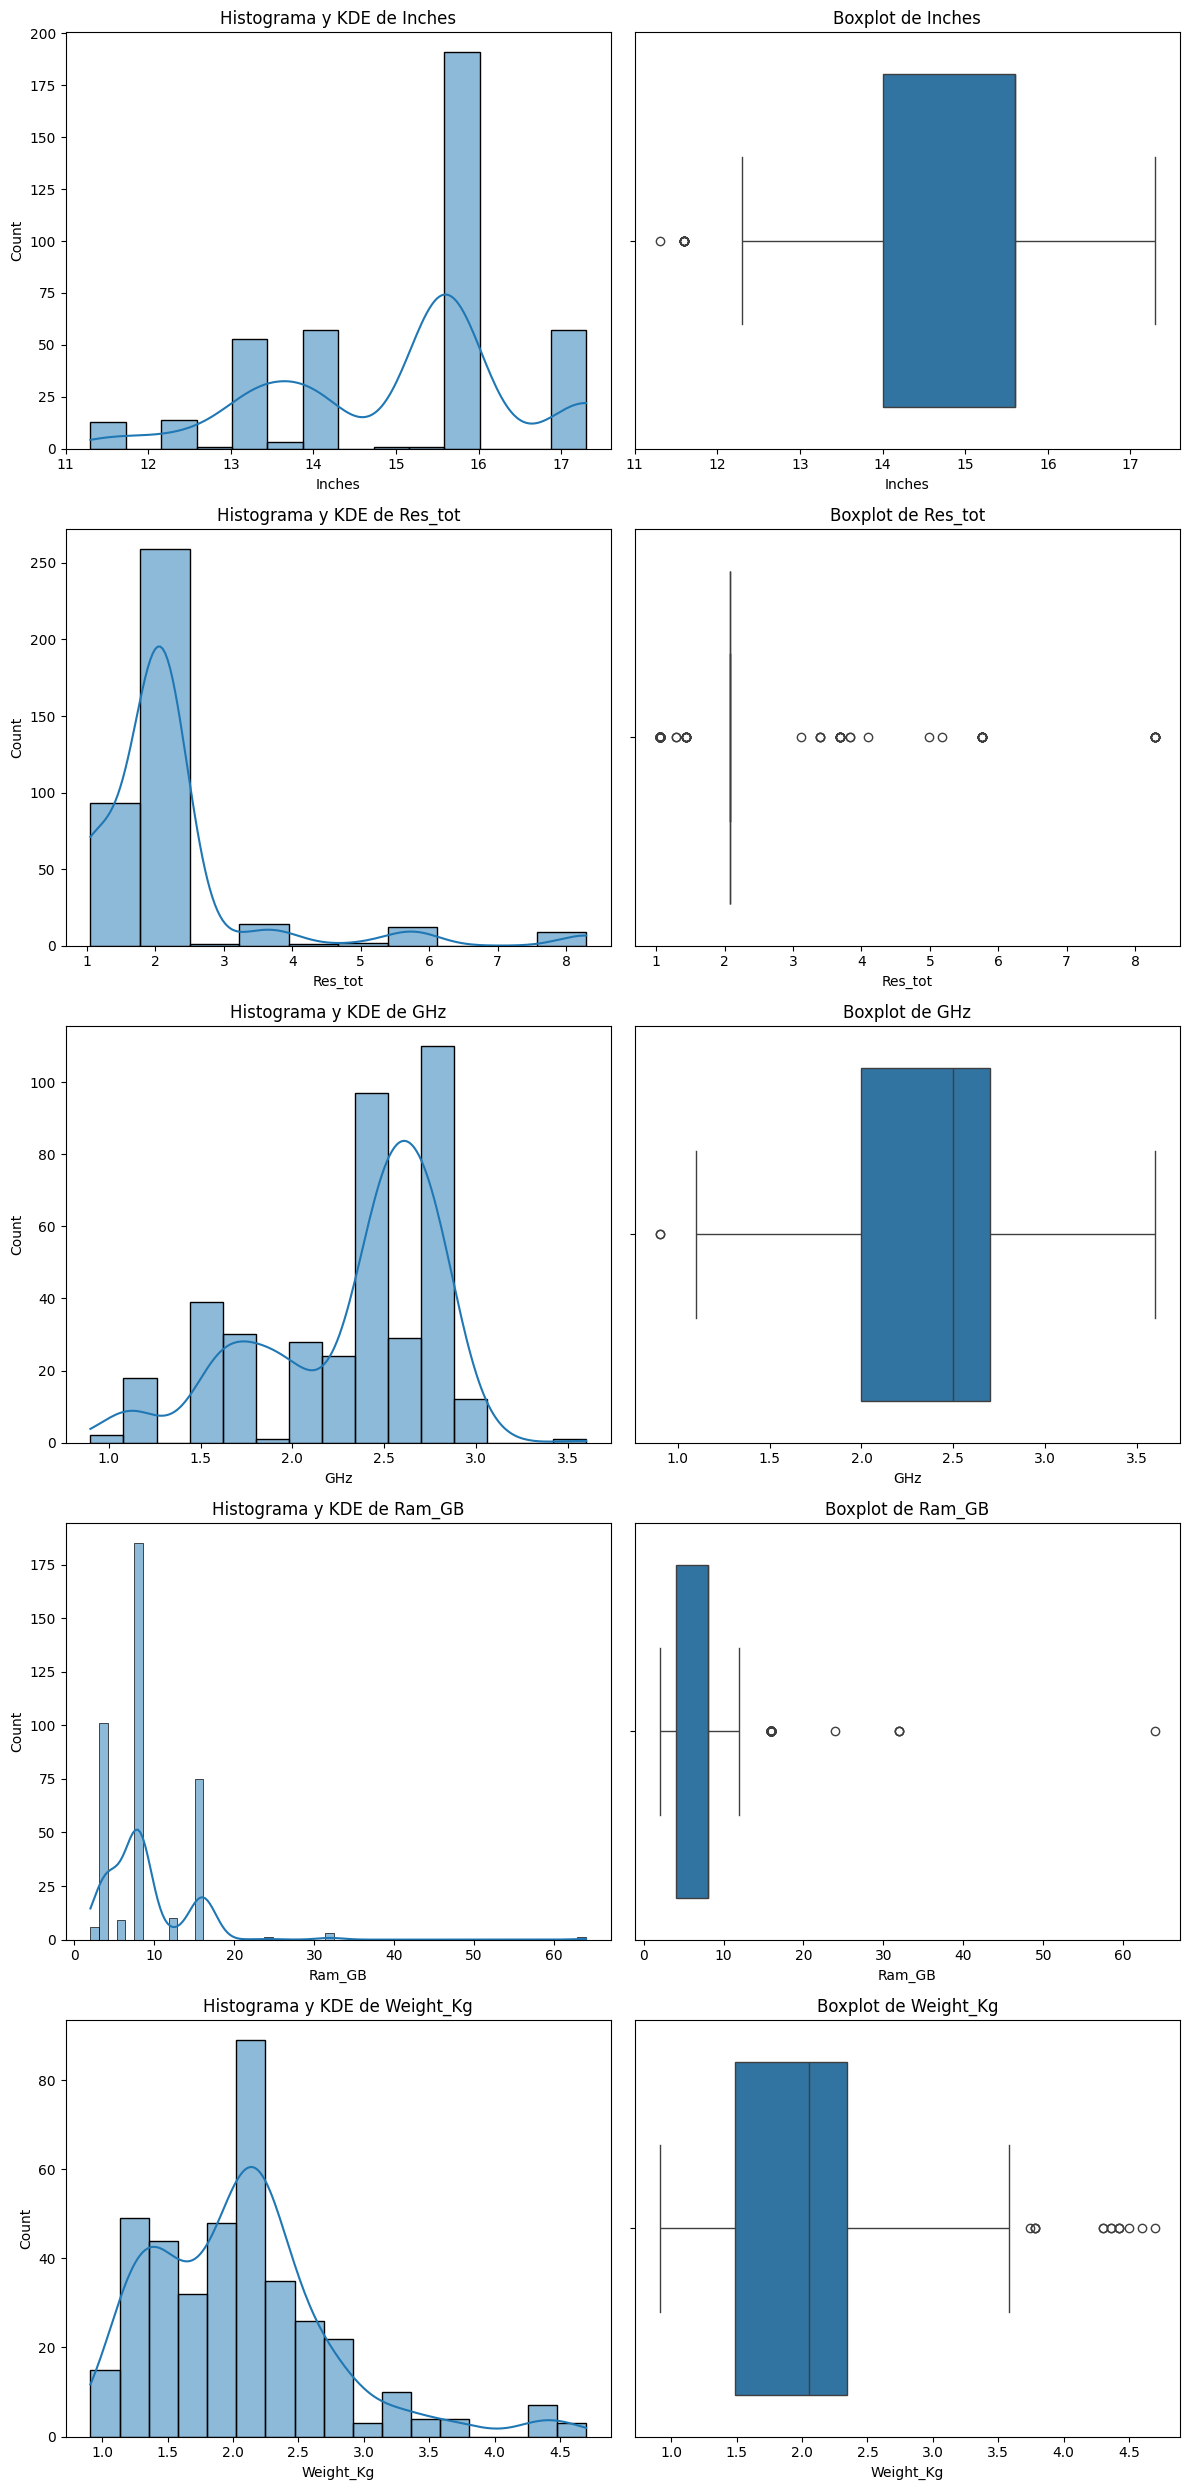

In [62]:
bt.plot_combined_graphs(train, [col for col in train.columns if not (col in feat_cat)])

In [63]:
train  = pd.get_dummies(train, columns=feat_cat)
train

,Inches,Res_tot,GHz,Ram_GB,Weight_Kg,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Company_map_Dell,Company_map_HP,Company_map_Lenovo,Company_map_Resto
0,13.3,8.294400,2.7,16,1.30,False,False,False,False,True,False,False,True,False,False
1,15.6,1.049088,2.7,8,2.20,False,False,False,True,False,False,False,False,False,True
2,15.6,1.049088,2.0,4,2.40,False,False,False,True,False,False,False,False,False,True
3,14.0,2.073600,2.3,8,1.43,False,False,False,True,False,False,False,True,False,False
4,13.3,2.073600,2.5,8,1.34,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,15.6,2.073600,2.8,8,2.40,False,True,False,False,False,False,False,False,True,False
387,15.6,2.073600,2.6,16,3.31,False,True,False,False,False,False,False,False,True,False
388,15.6,1.049088,2.5,4,1.96,False,False,False,True,False,False,False,True,False,False
389,15.6,2.073600,1.5,4,2.10,False,False,False,True,False,False,False,True,False,False


In [64]:
train.to_csv("./data/test_tratado.csv")

-----------------------------------------------------------------------------------------------------------------